In [26]:
## IMPORT NECESSARY LIBRARIES
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
import os
import tarfile
from sklearn.model_selection import train_test_split

In [27]:
## LOADING THE IMAGE DATA
dataset = tfds.load("eurosat", split="train", as_supervised=True)





In [28]:
## FUNCTION FOR VISUALIZING THE IMAGES PROPERLY NORMALIZED
def visualize_rgb(image, label):


    ### SCALING THE IMAGES TO 0 TO 1 FOR PROPER MATPLOTLIB RENDERING
    image = image.astype(np.float32) / 255.0
    image = np.clip(image, 0, 1)

   ### FOR DISPLAYING THE IMAGES
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Label: {label}")
    plt.show()






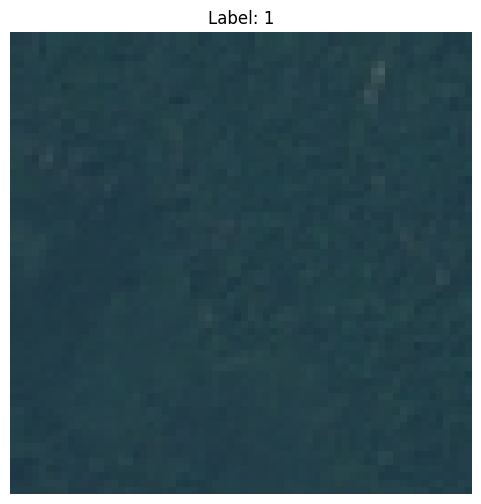

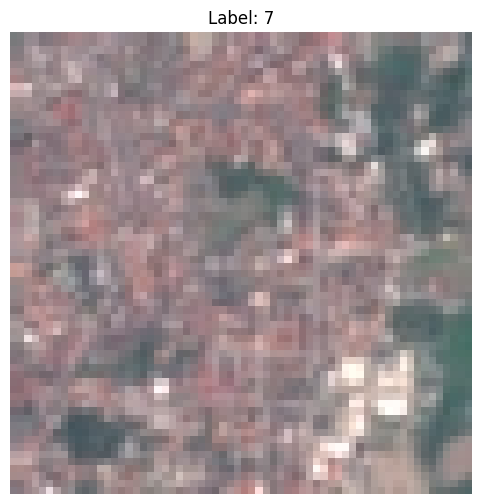

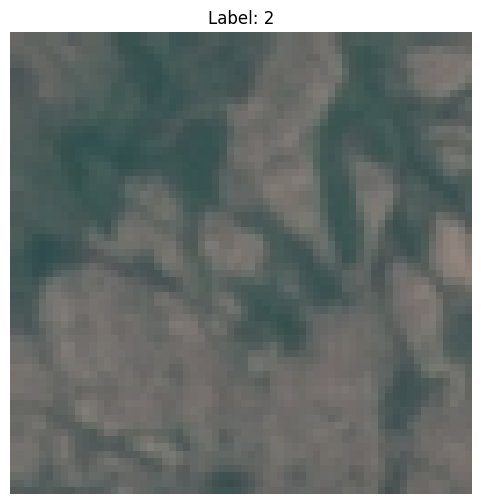

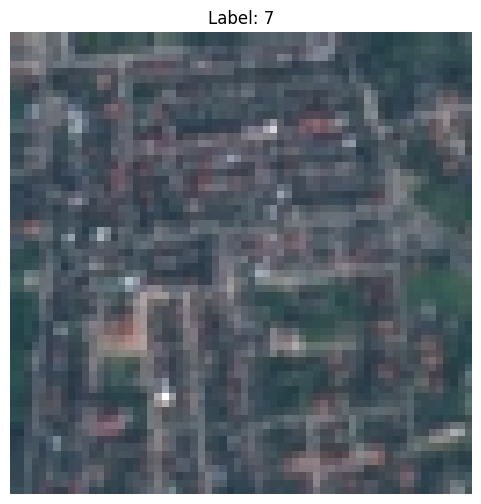

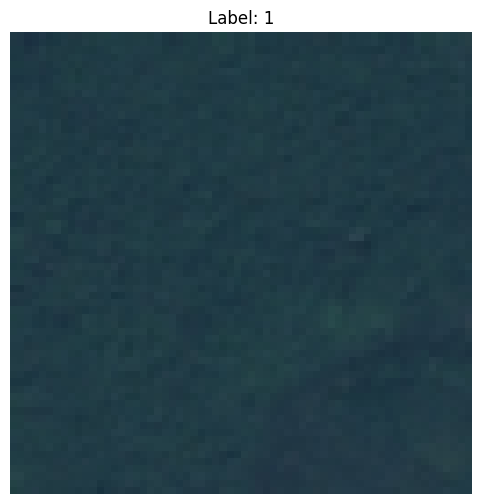

In [29]:
## VISUALIZING THE FIRST 5 IMAGES FROM THE DATASET
for i, (image, label) in enumerate(dataset.take(5)):
    image = image.numpy()
    visualize_rgb(image, label.numpy())



In [30]:
## SPLITTING THE IMAGES INTO TRAIN AND TEST MANUALLY
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

In [31]:
## RESIZING AND NORMALIZING THE IMAGES
def preprocess(image, label):

    image = tf.image.resize(image, (224, 224))

    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label


In [32]:
## MAP PREPROCESSING TO DATASETS
train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


In [33]:
## ## LOADING THE MobileNetV2 MODEL THAT IS PRE-TRAINED ON THE IMAGENET
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [34]:
## FREEZE THE BASE MODEL FOR FEATURE EXTRACTION
base_model.trainable = False


In [35]:
## BUILDING THE CUSTOM MODEL ON THE TOP OF MOBILENETV2
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [36]:
## MODEL COMPILATION
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
## TRAINING THE MODEL
history = model.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - accuracy: 0.6573 - loss: 0.9761 - val_accuracy: 0.7774 - val_loss: 0.6046
Epoch 2/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.7780 - loss: 0.6114 - val_accuracy: 0.7970 - val_loss: 0.5489
Epoch 3/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.8000 - loss: 0.5559 - val_accuracy: 0.8119 - val_loss: 0.5221
Epoch 4/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.8140 - loss: 0.5154 - val_accuracy: 0.8165 - val_loss: 0.5080
Epoch 5/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.8253 - loss: 0.4855 - val_accuracy: 0.8189 - val_loss: 0.4999


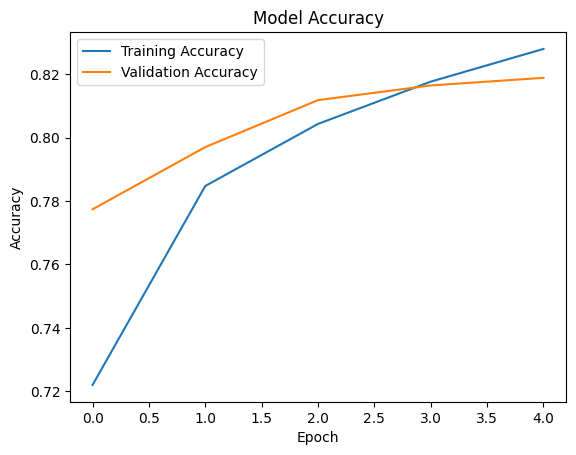

In [38]:
## VISUALISING THE TRAINING HISTORY OF THE MODEL
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [39]:
## EVALUATING THE PERFORMANCE OF THE MODEL
loss, accuracy = model.evaluate(test_ds)
print(accuracy)

169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8150 - loss: 0.5068
0.8188889026641846
